In [264]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
data_attraction_gg = db['data_attraction_gg_04']
data_attraction_gg = data_attraction_gg.find()
data_attraction_gg = pd.DataFrame(data_attraction_gg)
data_kintex_schedule = db['data_kintex_schedule']
data_kintex_schedule = data_kintex_schedule.find()
data_kintex_schedule = pd.DataFrame(data_kintex_schedule)
data_attraction_rank = db['data_attraction_rank']
data_attraction_rank = data_attraction_rank.find()
data_attraction_rank = pd.DataFrame(data_attraction_rank)
data_restaurant_rank = db['data_restaurant_rank']
data_restaurant_rank = data_restaurant_rank.find()
data_restaurant_rank = pd.DataFrame(data_restaurant_rank)
data_coffee = db['data_coffee']
data_coffee = data_coffee.find()
data_coffee = pd.DataFrame(data_coffee)
data_attraction_gg

,_id,2019,2020,2021,2022,2023,region,region_detail,attraction
0,664aec2b2581fd20a9efd6e6,3494.0,0.0,0.0,0.0,821.0,경기도,수원시,kbs수원센터(kbs수원아트홀)
1,664aec2b2581fd20a9efd6e7,NaN,0.0,34.0,1327.0,2350.0,경기도,수원시,경기대학교소성박물관
2,664aec2b2581fd20a9efd6e8,NaN,0.0,1557.0,6825.0,3128.0,경기도,수원시,서수원칠보체육관
3,664aec2b2581fd20a9efd6e9,NaN,0.0,776.0,686.0,836.0,경기도,수원시,수원 구 부국원
4,664aec2b2581fd20a9efd6ea,9761.0,0.0,546.0,6329.0,2638.0,경기도,수원시,수원sk아트리움
...,...,...,...,...,...,...,...,...,...
425,664aec2b2581fd20a9efd88f,116320.0,86875.0,98311.0,153836.0,77670.0,경기도,양평군,용문산관광지
426,664aec2b2581fd20a9efd890,1542.0,0.0,1809.0,3246.0,2172.0,경기도,양평군,용문산자연휴양림
427,664aec2b2581fd20a9efd891,NaN,NaN,NaN,NaN,1131.0,경기도,양평군,이함캠퍼스
428,664aec2b2581fd20a9efd892,1366.0,0.0,299.0,589.0,881.0,경기도,양평군,지평의병 지평리전투기념관


In [265]:
 data_attraction_gg = data_attraction_gg[~data_attraction_gg['attraction'].str.contains('클럽|CC|골프|C.C')]

In [266]:
data_attraction_gg = data_attraction_gg.fillna(0)
pivot_gg = pd.pivot_table(data_attraction_gg,index='region_detail',values=['2020','2021','2022','2023'],aggfunc='sum')
pivot_gg =  pivot_gg.sort_values('2023',ascending =False)
pivot_gg[:5].T

region_detail,고양시,과천시,용인시,파주시,양평군
2020,124930.0,182259.0,315454.0,417429.0,320935.0
2021,140198.0,332586.0,511359.0,446733.0,393407.0
2022,352873.0,737096.0,826879.0,521702.0,378258.0
2023,927426.0,821662.0,780873.0,525442.0,377534.0


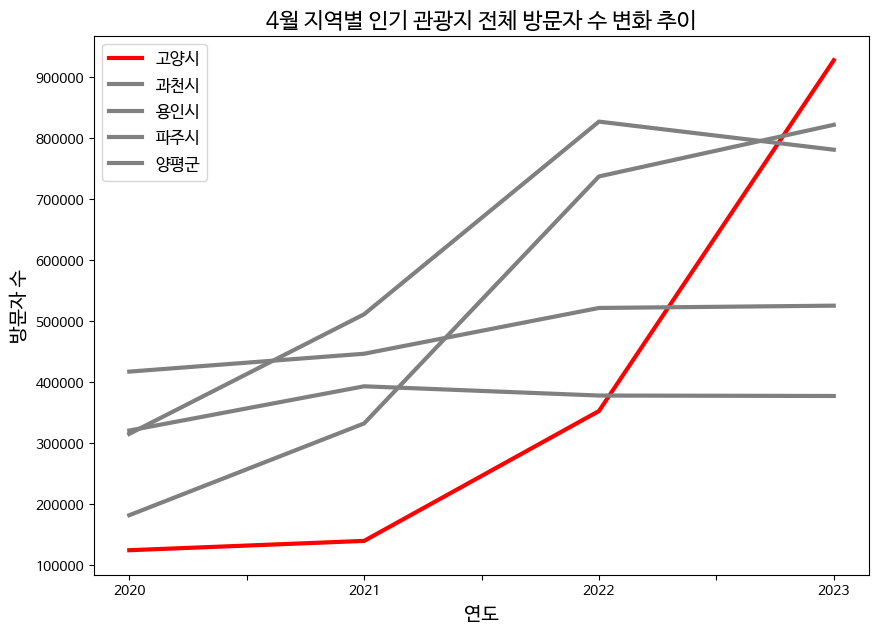

In [302]:
import matplotlib.pyplot as plt

pivot_gg_5 = pivot_gg[:5].T

# 선 그래프 그리기
ax = pivot_gg_5.plot(kind='line', figsize=(10, 7), linewidth=3)  # 선 굵기 설정

# '고양시' 그래프만 다른 색상으로 설정
ax.lines[0].set_color('r')
for i in range(1, len(ax.lines)):
    ax.lines[i].set_color('gray')

# 범례 설정
ax.legend(pivot_gg_5.columns, loc='upper left', fontsize=12)  # 범례 선 굵기 설정

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('4월 지역별 인기 관광지 전체 방문자 수 변화 추이', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)

# 그래프 표시
plt.show()

In [268]:
data_attraction_gg.sort_values('2023',ascending =False)

,_id,2019,2020,2021,2022,2023,region,region_detail,attraction
102,664aec2b2581fd20a9efd74c,826342.0,0.0,14231.0,161131.0,649454.0,경기도,고양시,KINTEX(한국국제전시장)
175,664aec2b2581fd20a9efd795,616392.0,244803.0,392165.0,660349.0,541477.0,경기도,용인시,에버랜드
126,664aec2b2581fd20a9efd764,268557.0,0.0,285.0,202052.0,279102.0,경기도,과천시,경마공원
129,664aec2b2581fd20a9efd767,283209.0,130651.0,176280.0,257461.0,221417.0,경기도,과천시,서울대공원
413,664aec2b2581fd20a9efd883,175708.0,129654.0,158324.0,69739.0,154542.0,경기도,양평군,두물머리
...,...,...,...,...,...,...,...,...,...
104,664aec2b2581fd20a9efd74e,2440.0,0.0,0.0,0.0,0.0,경기도,고양시,고양생태공원
103,664aec2b2581fd20a9efd74d,114886.0,0.0,0.0,991.0,0.0,경기도,고양시,고양꽃전시관
99,664aec2b2581fd20a9efd749,0.0,0.0,0.0,0.0,0.0,경기도,안산시,호수공원야외수영장
284,664aec2b2581fd20a9efd802,200.0,0.0,0.0,0.0,0.0,경기도,김포시,로그밸리 청소년수련원


In [269]:
data_attraction_gg_gy = data_attraction_gg.query("region_detail =='고양시'")
data_attraction_gg_gy = data_attraction_gg_gy.sort_values("2023",ascending =False)
data_attraction_gg_gy_5 = data_attraction_gg_gy[:5]
data_attraction_gg_gy_5

,_id,2019,2020,2021,2022,2023,region,region_detail,attraction
102,664aec2b2581fd20a9efd74c,826342.0,0.0,14231.0,161131.0,649454.0,경기도,고양시,KINTEX(한국국제전시장)
110,664aec2b2581fd20a9efd754,2180.0,0.0,1962.0,4557.0,66181.0,경기도,고양시,고양체육관
117,664aec2b2581fd20a9efd75b,49552.0,7565.0,22935.0,28427.0,37185.0,경기도,고양시,아쿠아플라넷 일산
115,664aec2b2581fd20a9efd759,31710.0,54375.0,40259.0,40757.0,34416.0,경기도,고양시,서오릉
125,664aec2b2581fd20a9efd763,25911.0,38474.0,20969.0,38742.0,32299.0,경기도,고양시,행주산성


In [270]:
data_attraction_gg = data_attraction_gg.fillna(0)
pivot_gy = pd.pivot_table(data_attraction_gg_gy,index='attraction',values=['2020','2021','2022','2023'],aggfunc='sum')
pivot_gy =  pivot_gy.sort_values('2023',ascending =False)
pivot_gy_5 = pivot_gy[:5].T

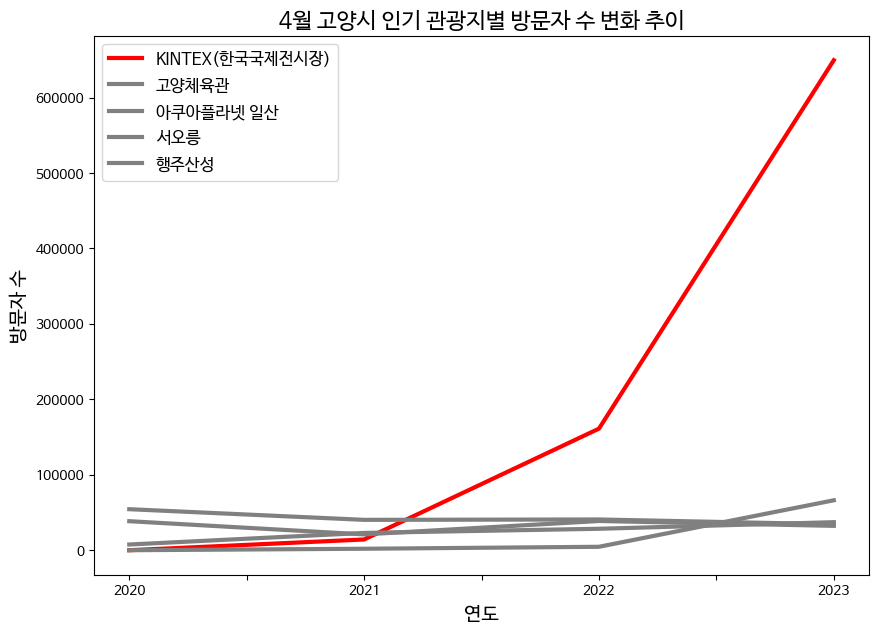

In [301]:
import matplotlib.pyplot as plt


# 선 그래프 그리기
ax = pivot_gy_5.plot(kind='line', figsize=(10, 7), linewidth=3)  # 선 굵기 설정

# '고양시' 그래프만 다른 색상으로 설정
ax.lines[0].set_color('r')
for i in range(1, len(ax.lines)):
    ax.lines[i].set_color('gray')

# 범례 설정
ax.legend(pivot_gy_5.columns, loc='upper left', fontsize=12)  # 범례 선 굵기 설정

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('4월 고양시 인기 관광지별 방문자 수 변화 추이', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)

# 그래프 표시
plt.show()

In [325]:
pivot_gy['관광지'] = round((pivot_gy['2020'] + pivot_gy['2021'] + pivot_gy['2022'] + pivot_gy['2023'])/4,2)
pivot_gy_total = pivot_gy.loc[:,'관광지':]
pivot_gy_total = pivot_gy_total.sort_values('관광지',ascending = False)

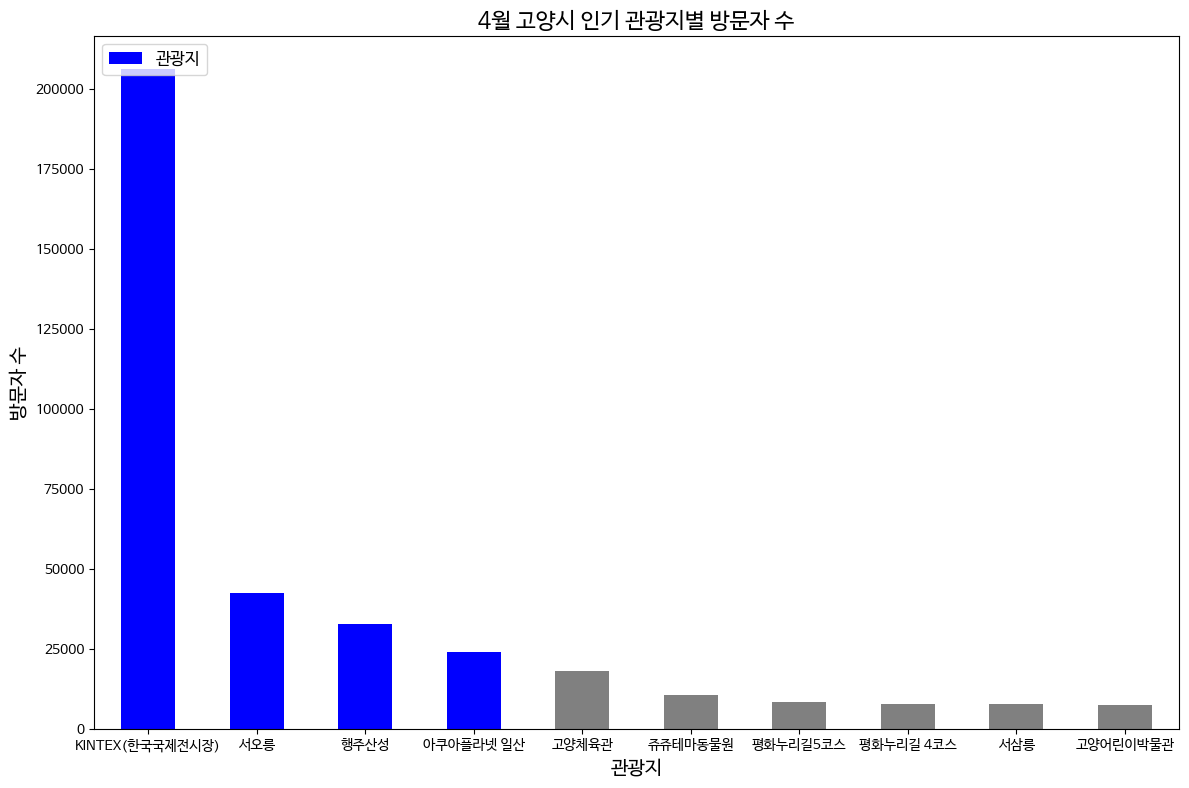

In [327]:
import matplotlib.pyplot as plt


# 선 그래프 그리기
ax = pivot_gy_total[:10].plot(kind='bar', figsize=(14, 9), linewidth=3)  # 선 굵기 설정

for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[0].set_facecolor('Blue')
ax.patches[1].set_facecolor('Blue')
ax.patches[2].set_facecolor('Blue')
ax.patches[3].set_facecolor('Blue')
# 범례 설정
ax.legend(pivot_gy_total.columns, loc='upper left', fontsize=12)  # 범례 선 굵기 설정

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('4월 고양시 인기 관광지별 방문자 수', fontsize=16)
plt.xlabel('관광지', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)
plt.xticks(rotation=0)

# 그래프 표시
plt.show()

# 유입 지역 분포

In [272]:
data_attraction_rank

,_id,rank,attraction,type,address,year
0,664adf772581fd20a9efd4f0,1,스타필드하남,쇼핑몰,경기 하남시 미사대로 750-0,2019
1,664adf772581fd20a9efd4f1,2,스타필드고양,쇼핑몰,경기 고양시 덕양구 고양대로 1955-0,2019
2,664adf772581fd20a9efd4f2,3,광명역,교통시설,경기 광명시 광명역로 21-0,2019
3,664adf772581fd20a9efd4f3,4,현대프리미엄아울렛김포점,쇼핑몰,경기 김포시 아라육로152번길 100-0,2019
4,664adf772581fd20a9efd4f4,5,현대백화점판교점,백화점,경기 성남시 분당구 판교역로146번길 20-0,2019
...,...,...,...,...,...,...
495,664adf782581fd20a9efd6df,96,임진각,기타관광,경기 파주시 임진각로 164-0,2023
496,664adf782581fd20a9efd6e0,97,모란민속5일장,시장,경기 성남시 중원구 둔촌대로 68-0,2023
497,664adf782581fd20a9efd6e1,98,뉴코아아울렛동수원점,대형마트,경기 수원시 팔달구 인계로 154-0,2023
498,664adf782581fd20a9efd6e2,99,행주산성,역사유적지,경기 고양시 덕양구 행주로15번길 89-0,2023


In [273]:
def address(row):
    address = row.split()
    address = address[1]
    return address
data_attraction_rank.loc[:,'address'] = data_attraction_rank['address'].apply(address)
data_restaurant_rank.loc[:,'address'] = data_restaurant_rank['address'].apply(address)

In [274]:
data_restaurant_rank['type'].unique()

array(['카페/찻집', '한식', '전문음식', '간이음식', '음식점기타', '외국식'], dtype=object)

In [275]:
data_restaurant_rank.query("address=='고양시'")

,_id,rank,restaurant,type,address,year
4,664adf672581fd20a9efd2fe,5,일산칼국수본점,한식,고양시,2019
7,664adf672581fd20a9efd301,8,강강술래늘봄농원점,한식,고양시,2019
13,664adf672581fd20a9efd307,14,행주산성원조국수집,한식,고양시,2019
24,664adf672581fd20a9efd312,25,가나안덕일산본점,전문음식,고양시,2019
53,664adf672581fd20a9efd32f,54,주막보리밥서오릉본점,한식,고양시,2019
63,664adf672581fd20a9efd339,64,고자리냉면칼만두본점,한식,고양시,2019
103,664adf672581fd20a9efd361,4,일산칼국수본점,한식,고양시,2020
105,664adf672581fd20a9efd363,6,포레스트아웃팅스일산본점,카페/찻집,고양시,2020
107,664adf672581fd20a9efd365,8,강강술래늘봄농원점,한식,고양시,2020
110,664adf672581fd20a9efd368,11,행주산성원조국수집,한식,고양시,2020


In [276]:
data_attraction_rank['type'].unique()

array(['쇼핑몰', '교통시설', '백화점', '테마공원', '자연생태', '전시시설', '기타관광', '랜드마크관광',
       '역사유적지', '시장', '도시공원', '자연경관(하천/해양)', '수상레저스포츠', '웰니스관광', '콘도미니엄',
       '자연경관(산)', '육상레저스포츠', '복합관광시설', '호텔', '대형마트', '공연시설', '레저스포츠시설'],
      dtype=object)

In [277]:
data_attraction_rank.query("type == '백화점'")

,_id,rank,attraction,type,address,year
4,664adf772581fd20a9efd4f4,5,현대백화점판교점,백화점,성남시,2019
16,664adf772581fd20a9efd500,17,신세계백화점경기점,백화점,용인시,2019
20,664adf772581fd20a9efd504,21,현대백화점킨텍스점,백화점,고양시,2019
27,664adf772581fd20a9efd50b,28,AK플라자수원,백화점,수원시,2019
30,664adf772581fd20a9efd50e,31,현대백화점중동점,백화점,부천시,2019
...,...,...,...,...,...,...
451,664adf782581fd20a9efd6b3,52,롯데백화점구리점,백화점,구리시,2023
452,664adf782581fd20a9efd6b4,53,롯데백화점동탄점,백화점,화성시,2023
456,664adf782581fd20a9efd6b8,57,롯데백화점중동점,백화점,부천시,2023
457,664adf782581fd20a9efd6b9,58,롯데백화점일산점,백화점,고양시,2023


In [278]:
data_attraction_rank = data_attraction_rank.query("type != '교통시설'")

In [279]:
pd.pivot_table(data_attraction_rank,index = 'address',values='attraction',aggfunc='count')

,attraction
address,
가평군,6
고양시,58
과천시,16
광명시,10
광주시,10
구리시,10
김포시,9
남양주시,3
부천시,19


In [280]:
pivot_restaurant = pd.pivot_table(data_restaurant_rank,index = ['address','type'],columns = 'year',values='restaurant',aggfunc='count')
pivot_restaurant = pivot_restaurant.sort_values(2023,ascending = False)

In [281]:
pivot_attraction = pd.pivot_table(data_attraction_rank,index =  ['address','type'],columns = 'year',values='attraction',aggfunc='count')
pivot_attraction = pivot_attraction.sort_values(2023,ascending = False)

In [282]:
pivot_restaurant


year           2019  2020  2021  2022  2023
address type                               
남양주시    카페/찻집   8.0  11.0   7.0   9.0   8.0
고양시     한식      5.0   5.0   4.0   5.0   6.0
파주시     카페/찻집   1.0   2.0   5.0   6.0   6.0
김포시     카페/찻집   2.0   4.0   3.0   5.0   4.0
양주시     한식      3.0   1.0   2.0   2.0   4.0
...             ...   ...   ...   ...   ...
평택시     카페/찻집   NaN   NaN   1.0   1.0   NaN
포천시     음식점기타   1.0   NaN   1.0   NaN   NaN
        한식      1.0   NaN   2.0   NaN   NaN
하남시     카페/찻집   NaN   1.0   2.0   NaN   NaN
화성시     카페/찻집   NaN   2.0   2.0   NaN   NaN

[74 rows x 5 columns]

In [283]:
pivot_attraction

year                 2019  2020  2021  2022  2023
address type                                     
용인시     육상레저스포츠       4.0   6.0   4.0   4.0   7.0
고양시     쇼핑몰           4.0   3.0   2.0   4.0   4.0
수원시     쇼핑몰           4.0   3.0   3.0   3.0   4.0
고양시     전시시설          2.0   1.0   1.0   2.0   3.0
수원시     백화점           2.0   3.0   3.0   3.0   3.0
...                   ...   ...   ...   ...   ...
파주시     공연시설          NaN   1.0   NaN   NaN   NaN
포천시     공연시설          NaN   NaN   1.0   1.0   NaN
        자연경관(산)       1.0   1.0   1.0   1.0   NaN
        자연경관(하천/해양)   NaN   1.0   1.0   1.0   NaN
화성시     도시공원          NaN   1.0   1.0   1.0   NaN

[87 rows x 5 columns]

In [284]:
pivot_gg[:5]

,2020,2021,2022,2023
region_detail,,,,
고양시,124930.0,140198.0,352873.0,927426.0
과천시,182259.0,332586.0,737096.0,821662.0
용인시,315454.0,511359.0,826879.0,780873.0
파주시,417429.0,446733.0,521702.0,525442.0
양평군,320935.0,393407.0,378258.0,377534.0


In [285]:
data_attraction_rank_yi = data_attraction_rank.query("address=='고양시'")
data_attraction_rank_yi
# data_attraction_rank_yi.query("type=='육상레저스포츠'")

,_id,rank,attraction,type,address,year
1,664adf772581fd20a9efd4f1,2,스타필드고양,쇼핑몰,고양시,2019
11,664adf772581fd20a9efd4fb,12,킨텍스제1전시장,전시시설,고양시,2019
20,664adf772581fd20a9efd504,21,현대백화점킨텍스점,백화점,고양시,2019
23,664adf772581fd20a9efd507,24,킨텍스제2전시장,전시시설,고양시,2019
33,664adf772581fd20a9efd511,34,라페스타,쇼핑몰,고양시,2019
36,664adf772581fd20a9efd514,37,일산호수공원,도시공원,고양시,2019
39,664adf772581fd20a9efd517,40,원마운트,쇼핑몰,고양시,2019
58,664adf772581fd20a9efd52a,59,아쿠아플라넷일산,테마공원,고양시,2019
65,664adf772581fd20a9efd531,66,롯데백화점일산점,백화점,고양시,2019
67,664adf772581fd20a9efd533,68,원마운트워터파크,테마공원,고양시,2019


In [286]:
 data_attraction_gg = data_attraction_gg[~data_attraction_gg['attraction'].str.contains('클럽|CC|골프')]

In [287]:
def month(row):
    row = row[5:7]
    return row
data_kintex_schedule['행사기간'] = data_kintex_schedule['행사기간'].apply(month)

In [288]:
data_kintex_schedule.rename(columns={'행사명': '전시회'}, inplace=True)

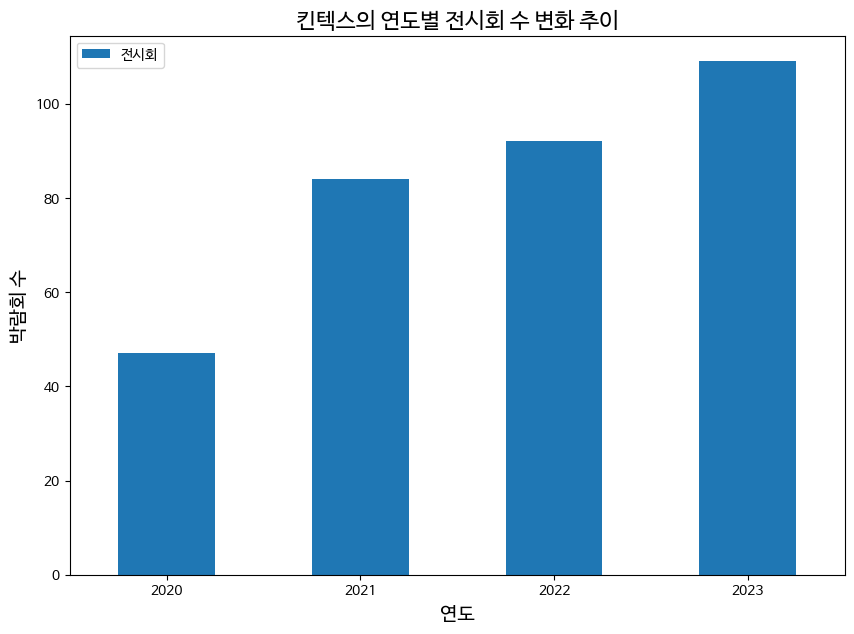

In [318]:
pivot_kintex = pd.pivot_table(data_kintex_schedule, index='년도', values='전시회',aggfunc='count')
import matplotlib.pyplot as plt


# 선 그래프 그리기
ax = pivot_kintex.plot(kind='bar', figsize=(10, 7))  # 선 굵기 설정

# '고양시' 그래프만 다른 색상으로 설정

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('킨텍스의 연도별 전시회 수 변화 추이', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('박람회 수', fontsize=14)
plt.xticks(rotation=0)

# 그래프 표시
plt.show()

In [290]:
data_coffee['A15_1'].unique()

array(['기능성 음료', '카페 커피', '흰우유', '두유', '가공우유', '100% 과일 주스', '가당 탄산음료',
       '발효유', '원두 커피, 인스턴트 커피', '무가당 탄산음료', '탄산수', '카페 커피 외 음료',
       '녹차, 곡물차', '물 이외의 음료는 마시지 않음', '이온 음료', '저과즙 음료'], dtype=object)

In [291]:
dict_a15_1 = dict(data_coffee['A15_1'].value_counts())
dict_a15_1 = dict(sorted(dict_a15_1.items(), key=lambda x: x[0]))
dict_a15_1

{'100% 과일 주스': 19,
 '가공우유': 16,
 '가당 탄산음료': 17,
 '기능성 음료': 8,
 '녹차, 곡물차': 12,
 '두유': 4,
 '무가당 탄산음료': 9,
 '물 이외의 음료는 마시지 않음': 1,
 '발효유': 25,
 '원두 커피, 인스턴트 커피': 26,
 '이온 음료': 9,
 '저과즙 음료': 3,
 '카페 커피': 62,
 '카페 커피 외 음료': 35,
 '탄산수': 23,
 '흰우유': 20}

In [292]:
dict_a15_2 = dict(data_coffee['A15_2'].value_counts())
dict_a15_2 = dict(sorted(dict_a15_2.items(), key=lambda x: x[0]))
dict_a15_2

{'100% 과일 주스': 27,
 '가공우유': 14,
 '가당 탄산음료': 19,
 '기능성 음료': 9,
 '녹차, 곡물차': 11,
 '두유': 7,
 '무가당 탄산음료': 18,
 '물 이외의 음료는 마시지 않음': 1,
 '발효유': 16,
 '원두 커피, 인스턴트 커피': 26,
 '이온 음료': 23,
 '저과즙 음료': 4,
 '카페 커피': 41,
 '카페 커피 외 음료': 28,
 '탄산수': 17,
 '흰우유': 28}

In [293]:
dict_a15_3 = dict(data_coffee['A15_3'].value_counts())
dict_a15_3 = dict(sorted(dict_a15_3.items(), key=lambda x: x[0]))
dict_a15_3

{'100% 과일 주스': 21,
 '가공우유': 21,
 '가당 탄산음료': 16,
 '기능성 음료': 11,
 '녹차, 곡물차': 18,
 '두유': 9,
 '무가당 탄산음료': 9,
 '물 이외의 음료는 마시지 않음': 1,
 '발효유': 30,
 '원두 커피, 인스턴트 커피': 25,
 '이온 음료': 8,
 '저과즙 음료': 7,
 '카페 커피': 45,
 '카페 커피 외 음료': 24,
 '탄산수': 26,
 '흰우유': 18}

In [294]:
list(dict(data_coffee['A15_1'].value_counts()).values())

[62, 35, 26, 25, 23, 20, 19, 17, 16, 12, 9, 9, 8, 4, 3, 1]

In [295]:
coffee_pivot = pd.DataFrame({"name":list(dict_a15_1.keys()),"first":list(dict_a15_1.values()),"second":list(dict_a15_2.values()),"third":list(dict_a15_3.values())})
coffee_pivot['total'] = coffee_pivot['first'] + coffee_pivot['second'] + coffee_pivot['third']
coffee_pivot = coffee_pivot.sort_values('total',ascending = False)
coffee_pivot

,name,first,second,third,total
12,카페 커피,62,41,45,148
13,카페 커피 외 음료,35,28,24,87
9,"원두 커피, 인스턴트 커피",26,26,25,77
8,발효유,25,16,30,71
0,100% 과일 주스,19,27,21,67
14,탄산수,23,17,26,66
15,흰우유,20,28,18,66
2,가당 탄산음료,17,19,16,52
1,가공우유,16,14,21,51
4,"녹차, 곡물차",12,11,18,41


In [329]:
pivot_coffee = pd.pivot_table(coffee_pivot, index= 'name',values = 'total', aggfunc='sum')
pivot_coffee = pivot_coffee.sort_values("total",ascending = False)
pivot_coffee

,total
name,
카페 커피,148
카페 커피 외 음료,87
"원두 커피, 인스턴트 커피",77
발효유,71
100% 과일 주스,67
탄산수,66
흰우유,66
가당 탄산음료,52
가공우유,51


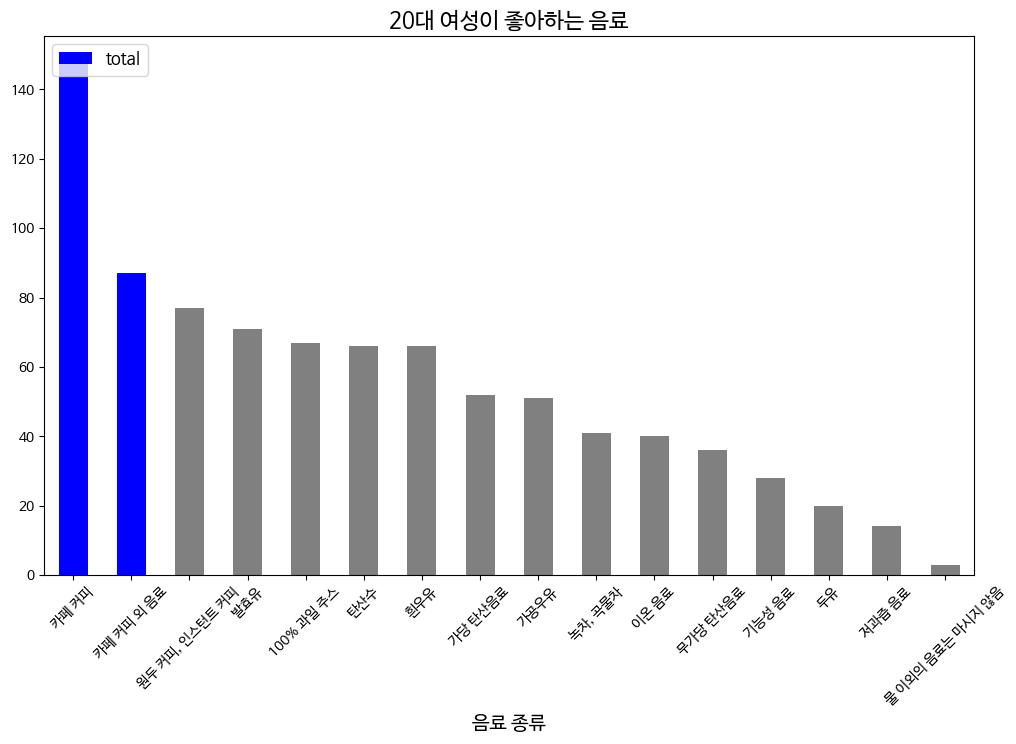

In [331]:

import matplotlib.pyplot as plt


# 선 그래프 그리기
ax = pivot_coffee.plot(kind='bar', figsize=(12, 7))  # 선 굵기 설정

# '고양시' 그래프만 다른 색상으로 설정
for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[0].set_facecolor('Blue')
ax.patches[1].set_facecolor('Blue')
# 범례 설정
ax.legend(pivot_coffee.columns, loc='upper left', fontsize=12)  # 범례 선 굵기 설정
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('20대 여성이 좋아하는 음료', fontsize=16)
plt.xlabel('음료 종류', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()